Aaditya Damle      - 1001955625

Akshay Sadalgekar  - 1001944713

Aishwarya Muchandi - 1001

In [1]:
# Using pandas for doing certain operations and explorations
# on dataframes 
import pandas as pd

# Scikit Learn contains the algorithm needed for 
# classification purpose 
import sklearn

# Using matplotlib to visualize the results
import matplotlib.pyplot as plt

## 1) Load Heart dataset from cardio_train.csv

In [2]:
# Use the read_csv command from pandas to load the csv 
# file as a dataframe
df_cardio = pd.read_csv("cardio_train.csv", sep=";")

# sep parameter is a delimeter to separate all the 
# values in a single record

## 2) Create a dataframe and print the first and last five records of your dataset. 

In [3]:
# Examining dataframe by viewing its first five records using the
# head command
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Examining dataframe by viewing its last five records using the
# indexes
df_cardio[-5:]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
#Examining dataframe by viewing its last five records. 
#We can also do the above using the tail command
df_cardio.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


## 3) Print the class labels.

In [6]:
# Examine the class labels 
# Class Labels are the classes of the target attribute in the 
# dataset. In our dataset the target attribute is "cardio".
# So the class values of the "cardio" attribute is displayed 
# along with the frequency of records in each class. 
# This can be easily achieved using value_counts() command.
classes = df_cardio["cardio"]
print("Class"+" "+"No. of records")
classes.value_counts()

Class No. of records


0    35021
1    34979
Name: cardio, dtype: int64

So we have 2 class values namely "1" and "0". Class value 0 conatins 35021 records and class value 1 contains 34979 records. 

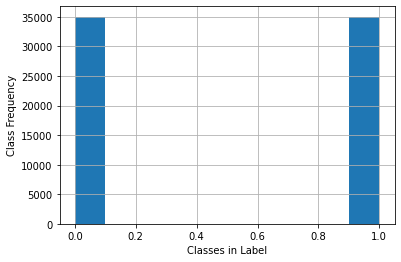

In [7]:
# A simple historgram is used to visualize these class values.
# Generating a histogram to visualize the class labels
classes.hist()
plt.xlabel("Classes in Label")
plt.ylabel("Class Frequency")
plt.show()

## Visualizing the dataset for target variable

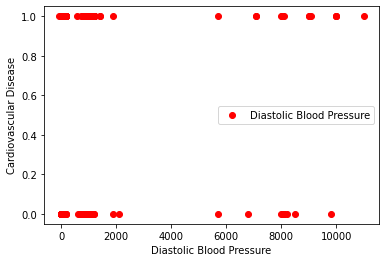

In [8]:
# Visualize the effect of Diastolic Blood Pressure on Cardiovascular Diseases 
plt.scatter(df_cardio["ap_lo"],df_cardio["cardio"], color = "red")
plt.xlabel("Diastolic Blood Pressure")
plt.ylabel("Cardiovascular Disease")
plt.legend(["Diastolic Blood Pressure"])
plt.show()

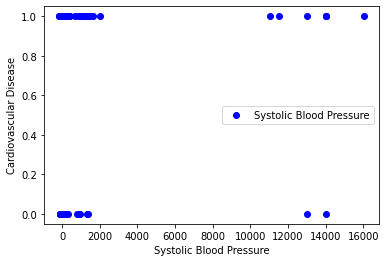

In [9]:
# Visualize the effect of Systolic Blood Pressure on Cardiovascular Diseases 
plt.scatter(df_cardio["ap_hi"],df_cardio["cardio"], color = "blue")
plt.xlabel("Systolic Blood Pressure")
plt.ylabel("Cardiovascular Disease")
plt.legend(["Systolic Blood Pressure"])
plt.show()

In [10]:
# Import seaborn to show graphics
import seaborn as sn

In [11]:
# Display a pair plot with target variable "cardio" as hue. 
# Select plot kind as "hist"
#sn.pairplot(df_cardio, hue="cardio", kind = "hist")

### Data Pre-processing 

In [12]:
# checking null items
print(df_cardio.isna().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


As there are no null items in any records of the dataset, no further handling of null values is required.

In [13]:
# The age value of each record is in days which is not a general
# measure of age. Hence the values in age column are converted 
# from days to years which is a lucid measure.  
# Coverting age-in-days to age-in-years
df_cardio["age"] = round(df_cardio["age"]/365)
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


## 4) Split your dataset 75% for training and 25% for testing the classifier.

### Define training and testing columns

In [14]:
# The training columns are all the columns except the 
# target column which is the last column in this case. 
X = df_cardio[df_cardio.columns[1:-1]]
# Print first five records to confirm that correct columns 
# are included
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.0,2,168,62.0,110,80,1,1,0,0,1
1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0
3,48.0,2,169,82.0,150,100,1,1,0,0,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0


In [15]:
# The testing column is the target column 
# which is the last column in this case.
y = df_cardio[df_cardio.columns[-1]]
# Print first five records to confirm that correct columns 
# are included. 
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [16]:
# Splitting the dataset 70% for training and 30% for testing

# Import the train_test_split function from  the model_selection
# library
from sklearn.model_selection import train_test_split

# Insert the training and testing columns as parameters in
# the function. Set test size as 0.3 i.e. 30%.
# Use random_state to save and regenerate the same split 
# in multiple runs
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,
                                                     y,
                                                     test_size=0.3,
                                                     random_state = 42)

# Decision Tree

## 1) Use gini and entropy to measure the quality of a split.

In [17]:
# Import and create the DecisionTreeClassifier object
from sklearn.tree import DecisionTreeClassifier

### a) Using Gini while training

In [18]:
# Selecting "Gini" as the criterion uses Gini impurity 
# to measure the quality of the split
DT_clfr_gini = DecisionTreeClassifier(criterion="gini", max_depth = 6, min_samples_leaf = 2, random_state = 42)
DT_clfr_gini
# As gini is the default value of the criterion parameter
# it can't be explicitly seen in the output
# max_depth limits the depth of the tree
# min_sample_leaf is a measure to ensure that both class values 1 and 0 are considered as leaves of the tree.
# random_state is used to generate the same output in multiple runs

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=42)

In [19]:
# Training the Decision Tree Classifier with gini
DT_clfr_gini.fit(Train_X, Train_Y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=42)

### b) Using Entropy while training

In [20]:
# Selecting "Entropy" as the criterion uses the information gain 
# to measure the quality of the split
DT_clfr_entropy = DecisionTreeClassifier(criterion="entropy", max_depth = 6, min_samples_leaf = 2, random_state = 42)
DT_clfr_entropy
# Print the classifier object to view the criterion value
# max_depth limits the depth of the tree
# min_sample_leaf is a measure to ensure that both class values 1 and 0 are considered as leaves of the tree.
# random_state is used to generate the same output in multiple runs

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       random_state=42)

In [21]:
# Training the Decision Tree Classifier with entropy
DT_clfr_entropy.fit(Train_X, Train_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       random_state=42)

## 3) Calculate and print the confusion matrix (We have used 2D Arrays as well as Graphics), classification report including all the scores.

### a) Using Gini while predicting

In [22]:
# Applying the trained classifer on the test set to obtain
# and save the predictions
DT_predict_gini = DT_clfr_gini.predict(Test_X) 

In [23]:
# Import accuracy_score, confusion_matrix and classification
# report from sklearn.metrics library. Classification report 
# includes of precision_score, recall_score, f1_score 
# and support.
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [24]:
# Calculate the accuracy score by comparing predictions and the 
# actual results of test set  
print("Decision Tree(Gini) Accuracy Score is ", round(accuracy_score(DT_predict_gini, Test_Y)*100, 3),"%")

Decision Tree(Gini) Accuracy Score is  73.314 %


In [25]:
# Showcase the result in the confusion matrix as 2-d matrix

DT_cm_gini = pd.DataFrame(
    confusion_matrix(Test_Y, DT_predict_gini),
    index = [['Actual', 'Actual'], ["Negative", 'Positive']],
    columns = [['Predicted', "Predicted"], ["Negative", "Positive"]])
print(DT_cm_gini)

                Predicted         
                 Negative Positive
Actual Negative      8387     2074
       Positive      3530     7009


Text(32.99999999999999, 0.5, 'Actual Values')

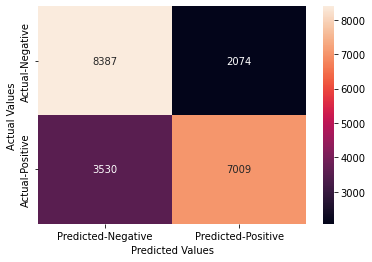

In [26]:
# Using seaborn to make the confusion matrix graphically 
# aesthetic and more intelligible  
sn.heatmap(DT_cm_gini,
           annot = True,
           fmt = ".4g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [27]:
# Classification Report for Decision Tree using Gini

print ("Classification report for Decision Tree(Gini) is \n ", 
       classification_report(DT_predict_gini, Test_Y))

Classification report for Decision Tree(Gini) is 
                precision    recall  f1-score   support

           0       0.80      0.70      0.75     11917
           1       0.67      0.77      0.71      9083

    accuracy                           0.73     21000
   macro avg       0.73      0.74      0.73     21000
weighted avg       0.74      0.73      0.73     21000



### b) Using Entropy while predicting

In [28]:
# Applying the trained classifer on the test set to obtain
# and save the predictions
DT_predict_entropy = DT_clfr_entropy.predict(Test_X)

In [29]:
# Calculate the accuracy score by comparing predictions and the 
# actual results of test set  
print("Decision Tree(Entropy) Accuracy Score is ", round(accuracy_score(DT_predict_entropy, Test_Y)*100, 3),"%")

Decision Tree(Entropy) Accuracy Score is  73.162 %


In [30]:
# Showcase the result in the confusion matrix as 2-d matrix

DT_cm_entropy = pd.DataFrame(
    confusion_matrix(Test_Y, DT_predict_entropy),
    index = [['Actual', 'Actual'], ["Negative", 'Positive']],
    columns = [['Predicted', "Predicted"], ["Negative", "Positive"]])
print(DT_cm_entropy)

                Predicted         
                 Negative Positive
Actual Negative      8338     2123
       Positive      3513     7026


Text(32.99999999999999, 0.5, 'Actual Values')

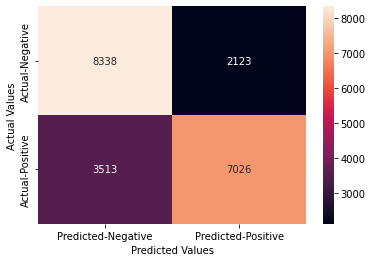

In [31]:
# Using seaborn to make the confusion matrix graphically 
# aesthetic and more intelligible  

sn.heatmap(DT_cm_entropy,
           annot = True,
           fmt = ".4g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [32]:
# Classification Report for Decision Tree using Entropy

print ("Classification report for Decision Tree(Entropy) is \n ", 
       classification_report(DT_predict_entropy, Test_Y))

Classification report for Decision Tree(Entropy) is 
                precision    recall  f1-score   support

           0       0.80      0.70      0.75     11851
           1       0.67      0.77      0.71      9149

    accuracy                           0.73     21000
   macro avg       0.73      0.74      0.73     21000
weighted avg       0.74      0.73      0.73     21000



## 4) Print the decision tree visualization with depth of 4, 5, 6. 

### a) Decision Tree Visualization (Gini)

In [33]:
from sklearn import tree

In [34]:
# Export the tree in text format using the tree.export tree function and save it in Dtree_gini_text variable
Dtree_gini_text = tree.export_text(DT_clfr_gini)
print(Dtree_gini_text)

|--- feature_4 <= 129.50
|   |--- feature_0 <= 54.50
|   |   |--- feature_6 <= 2.50
|   |   |   |--- feature_0 <= 45.50
|   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |--- feature_4 <= 114.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  114.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  1.50
|   |   |   |   |   |--- feature_3 <= 75.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  75.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  45.50
|   |   |   |   |--- feature_4 <= 119.50
|   |   |   |   |   |--- feature_3 <= 77.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  77.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  119.50
|   |   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  1.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_6 >  2.

[Text(836.15625, 1261.9285714285713, 'X[4] <= 129.5\ngini = 0.5\nsamples = 49000\nvalue = [24560, 24440]'),
 Text(430.3125, 1067.7857142857142, 'X[0] <= 54.5\ngini = 0.435\nsamples = 29027\nvalue = [19742, 9285]'),
 Text(216.0, 873.6428571428571, 'X[6] <= 2.5\ngini = 0.364\nsamples = 17761\nvalue = [13515, 4246]'),
 Text(108.0, 679.5, 'X[0] <= 45.5\ngini = 0.347\nsamples = 16985\nvalue = [13191, 3794]'),
 Text(54.0, 485.3571428571429, 'X[6] <= 1.5\ngini = 0.255\nsamples = 5556\nvalue = [4722, 834]'),
 Text(27.0, 291.2142857142858, 'X[4] <= 114.5\ngini = 0.233\nsamples = 5024\nvalue = [4346, 678]'),
 Text(13.5, 97.07142857142867, 'gini = 0.166\nsamples = 2089\nvalue = [1898, 191]'),
 Text(40.5, 97.07142857142867, 'gini = 0.277\nsamples = 2935\nvalue = [2448, 487]'),
 Text(81.0, 291.2142857142858, 'X[3] <= 75.5\ngini = 0.414\nsamples = 532\nvalue = [376, 156]'),
 Text(67.5, 97.07142857142867, 'gini = 0.365\nsamples = 329\nvalue = [250, 79]'),
 Text(94.5, 97.07142857142867, 'gini = 0.471\

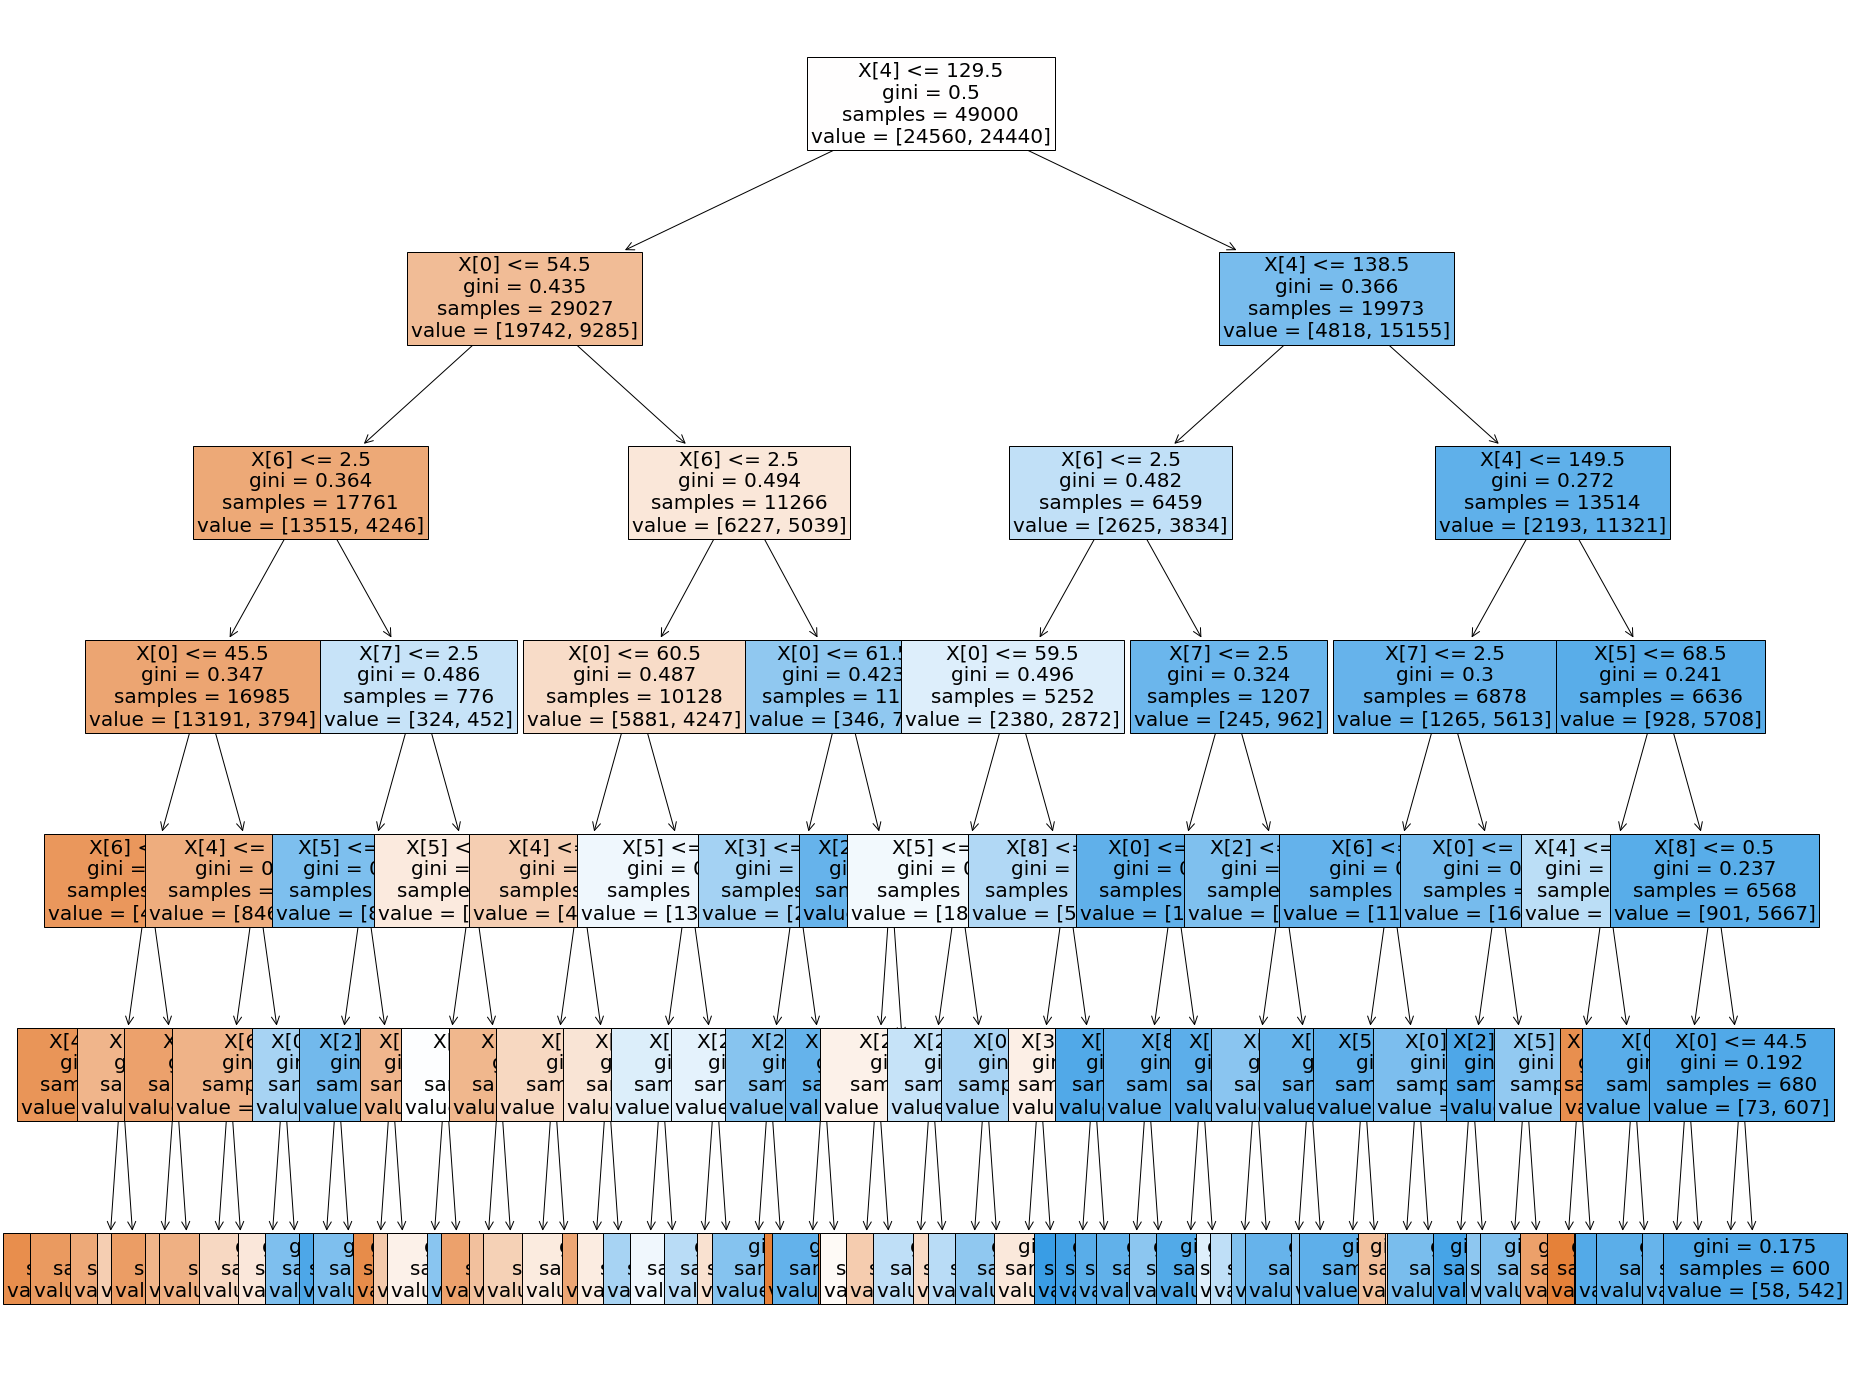

In [35]:
fig = plt.figure(figsize=(30,25))
tree.plot_tree(DT_clfr_gini, filled=True, max_depth = 6, fontsize = 20)

### b) Decision Tree Visualization (Entropy)

In [36]:
# Export the tree in text format using the tree.export tree function and save it in Dtree_gini_text variable
Dtree_entropy_text = tree.export_text(DT_clfr_entropy)
print(Dtree_entropy_text)

|--- feature_4 <= 129.50
|   |--- feature_0 <= 54.50
|   |   |--- feature_6 <= 1.50
|   |   |   |--- feature_0 <= 44.50
|   |   |   |   |--- feature_4 <= 114.50
|   |   |   |   |   |--- feature_7 <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  114.50
|   |   |   |   |   |--- feature_0 <= 42.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  42.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  44.50
|   |   |   |   |--- feature_4 <= 119.50
|   |   |   |   |   |--- feature_3 <= 77.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  77.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  119.50
|   |   |   |   |   |--- feature_3 <= 82.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  82.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_6 >  

[Text(847.4625, 1261.9285714285713, 'X[4] <= 129.5\nentropy = 1.0\nsamples = 49000\nvalue = [24560, 24440]'),
 Text(444.65625, 1067.7857142857142, 'X[0] <= 54.5\nentropy = 0.904\nsamples = 29027\nvalue = [19742, 9285]'),
 Text(223.2, 873.6428571428571, 'X[6] <= 1.5\nentropy = 0.793\nsamples = 17761\nvalue = [13515, 4246]'),
 Text(111.6, 679.5, 'X[0] <= 44.5\nentropy = 0.74\nsamples = 15115\nvalue = [11951, 3164]'),
 Text(55.8, 485.3571428571429, 'X[4] <= 114.5\nentropy = 0.561\nsamples = 4711\nvalue = [4092, 619]'),
 Text(27.9, 291.2142857142858, 'X[7] <= 1.5\nentropy = 0.434\nsamples = 1971\nvalue = [1795, 176]'),
 Text(13.95, 97.07142857142867, 'entropy = 0.409\nsamples = 1865\nvalue = [1712, 153]'),
 Text(41.849999999999994, 97.07142857142867, 'entropy = 0.755\nsamples = 106\nvalue = [83, 23]'),
 Text(83.69999999999999, 291.2142857142858, 'X[0] <= 42.5\nentropy = 0.638\nsamples = 2740\nvalue = [2297, 443]'),
 Text(69.75, 97.07142857142867, 'entropy = 0.579\nsamples = 1820\nvalue = [

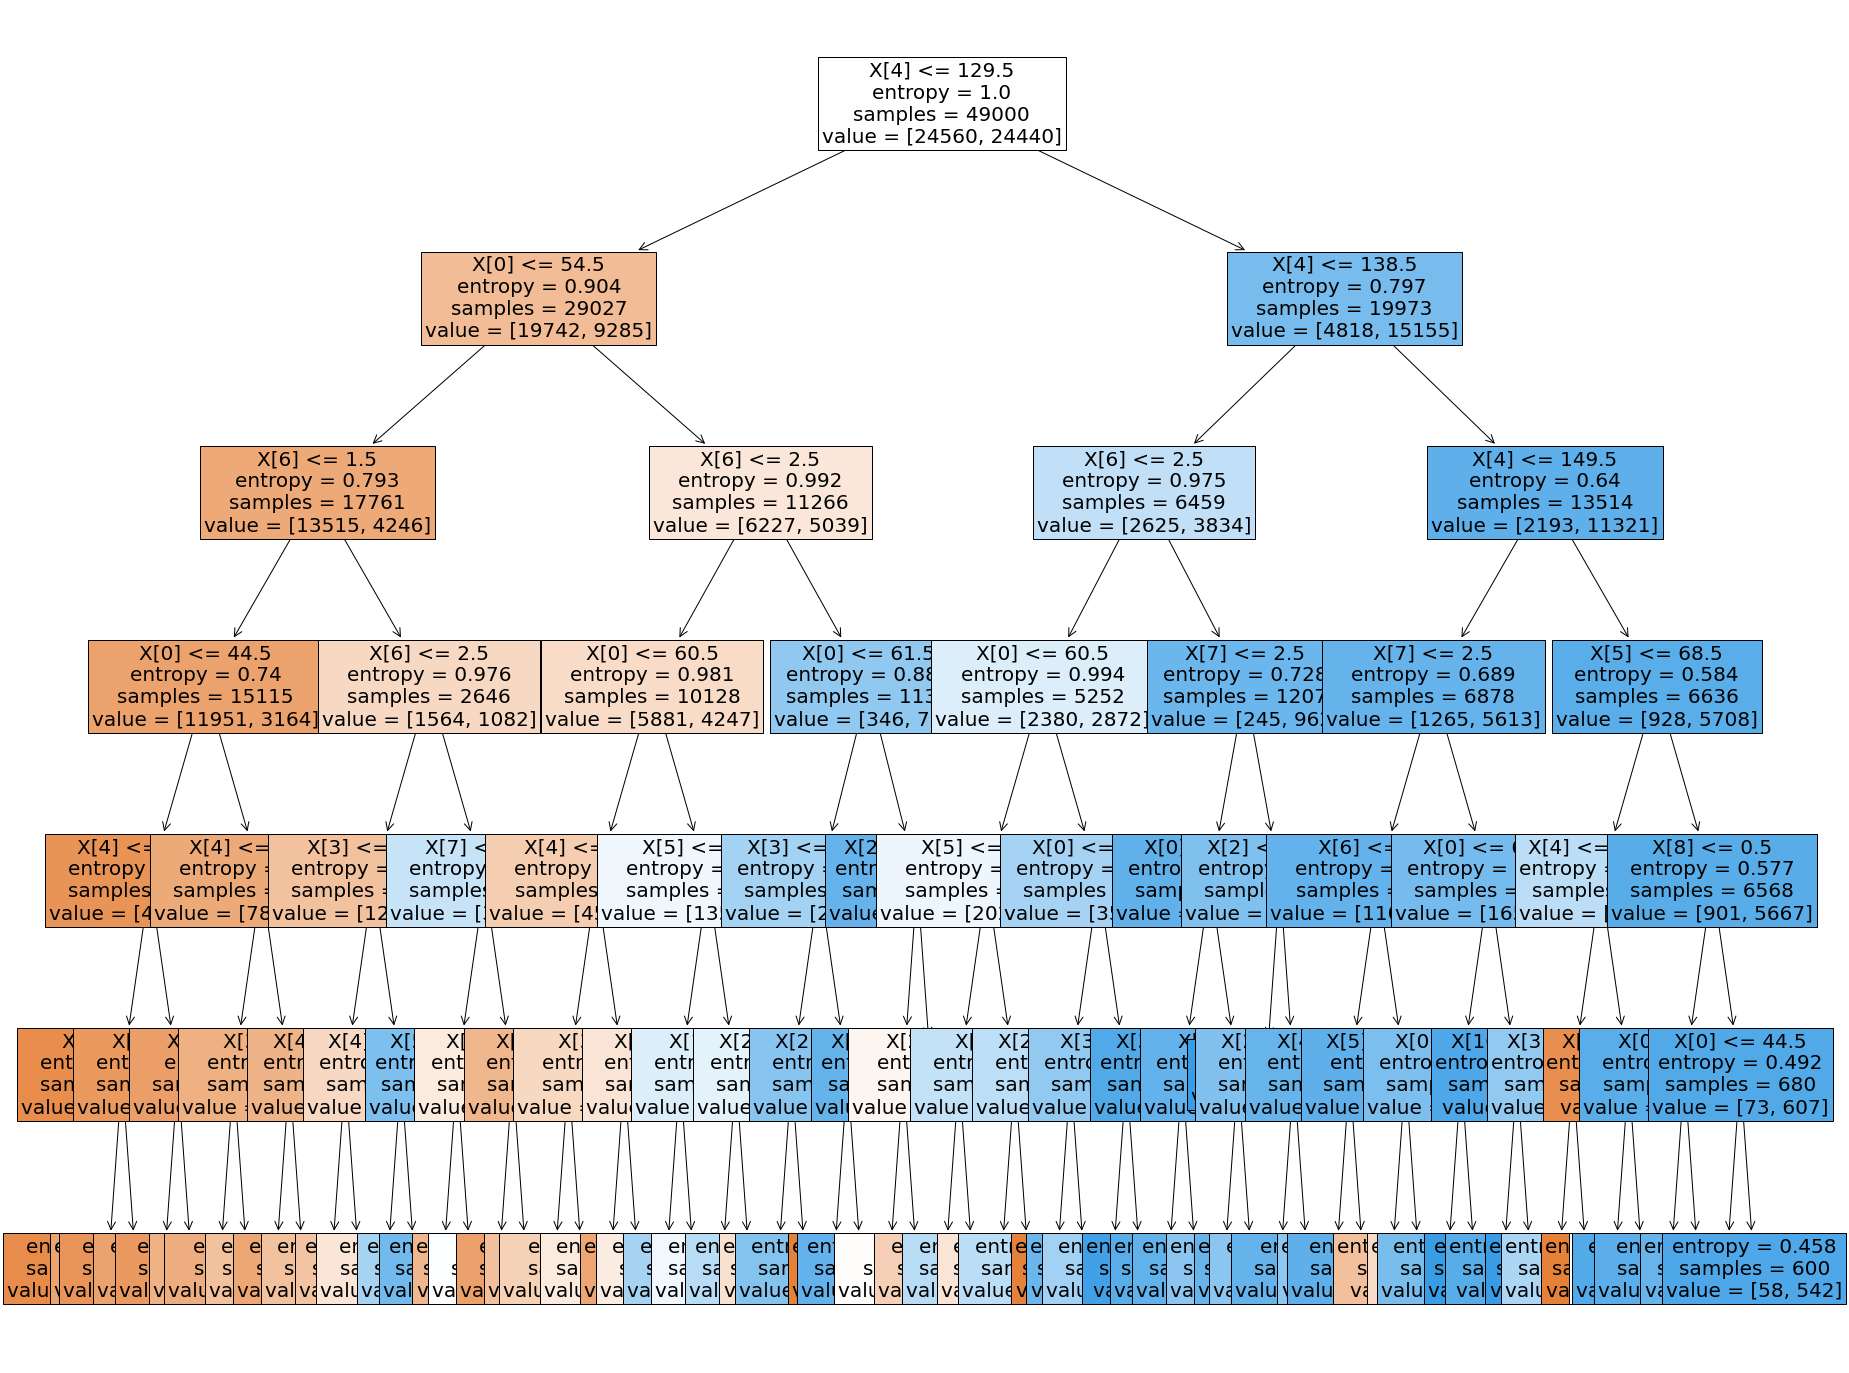

In [37]:
plt.figure(figsize=(30,25))
tree.plot_tree(DT_clfr_entropy, filled=True, max_depth = 6, fontsize = 20)

# Naive Bayes Classifier

## 1) Use Naive Bayes Classifier(Gaussian) to predict the test data

In [38]:
# Import and create the Naive Bayes Classifier object
from sklearn.naive_bayes import GaussianNB
NB_clfr = GaussianNB()

In [39]:
# Training the Naive Bayes Classifier
NB_clfr.fit(Train_X,Train_Y)

GaussianNB()

In [40]:
# Applying the trained classifer on the test set to obtain
# and save the predictions
NB_predict = NB_clfr.predict(Test_X)

## 3) Calculate and print the confusion matrix (We have used 2D Arrays as well as Graphics), classification report including all the scores.

In [41]:
# Calculate the accuracy score by comparing predictions and the 
# actual results of test set
print("Naive Bayes Accuracy Score is ",accuracy_score(NB_predict, Test_Y)*100)

Naive Bayes Accuracy Score is  59.452380952380956


In [42]:
# Showcase the result in the confusion matrix
NB_cm = pd.DataFrame(
    confusion_matrix(Test_Y, NB_predict),
    index = [['Actual', 'Actual'], ['Negative', 'Positive']],
    columns = [['Predicted', 'Predicted'], ['Negative', 'Positive']])
print(NB_cm)

                Predicted         
                 Negative Positive
Actual Negative      9072     1389
       Positive      7126     3413


Text(32.99999999999999, 0.5, 'Actual Values')

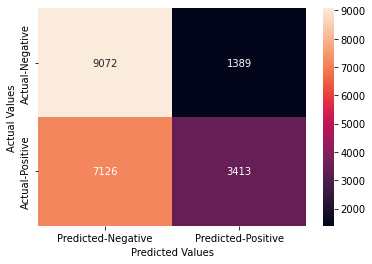

In [43]:
# Using seaborn to make the confusion matrix graphically 
# aesthetic and more intelligible
sn.heatmap(NB_cm, annot = True, fmt=".4g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [44]:
# Classification Report for Naive Bayes

print("Classification report for Naive Bayes is \n",classification_report(NB_predict, Test_Y))

Classification report for Naive Bayes is 
               precision    recall  f1-score   support

           0       0.87      0.56      0.68     16198
           1       0.32      0.71      0.44      4802

    accuracy                           0.59     21000
   macro avg       0.60      0.64      0.56     21000
weighted avg       0.74      0.59      0.63     21000

